### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_column', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(('credit_scoring_dataset.csv'), index_col='customer_id')
print(df.shape)
df.head()

(32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
49d00b80-f7ec-41ec-8063-8cc32f384268,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
25172c7f-160a-44ac-b271-5833b7a679f6,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
a8f721ac-9696-48b3-ae35-bc8b13592d26,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
53be6c0c-0a33-41c1-a8d0-e9784b077f98,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 3.0+ MB


## Univariate Analysis
Understanding "each variable"

IR = (negative_class/positive_class)
        
positive_class is the number of minority class samples

negative_class is the number of majority class samples

Good    25472
Bad      7109
Name: loan_status, dtype: int64
Good    78.180535
Bad     21.819465
Name: loan_status, dtype: float64
Imbalance Ratio (IR) = 1:3


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\3437140035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')


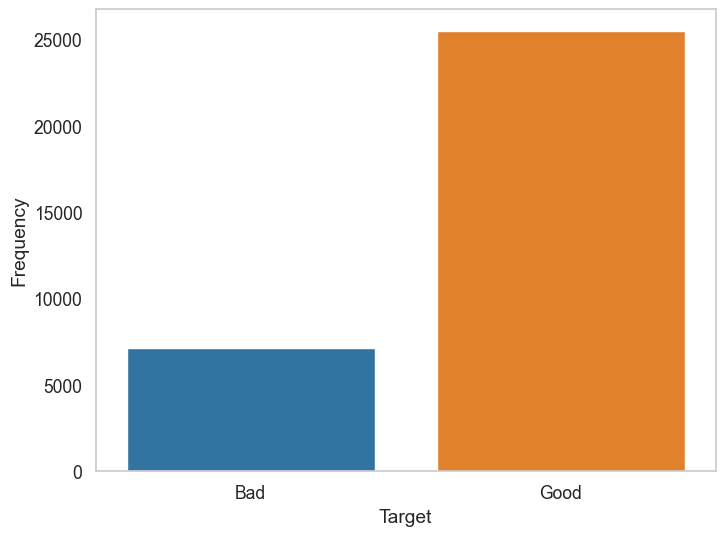

In [4]:
df_target = df[['loan_status']]
df_target['loan_status'] = np.where(df_target['loan_status']==1,'Bad','Good')

print(df_target['loan_status'].value_counts()) # นับจำนวน Good/Bad
print(df_target['loan_status'].value_counts()/len(df_target)*100) # เปลี่ยนให้กลายเป็น %

fig = plt.figure(figsize=(8,6)) # Figure setting
sns.countplot(x='loan_status',data=df_target, palette='tab10') #define data
plt.xlabel('Target') # define X label
plt.ylabel('Frequency') #define Y label
plt.grid(False) #Hide grid

count_good = len(df_target.loc[df_target['loan_status']=='Good'])
count_bad = len(df_target.loc[df_target['loan_status']=='Bad'])

print("Imbalance Ratio (IR) = 1:{}".format(int(count_good/count_bad))) #Building Imbalance Ratio

In [5]:
df.describe() # mean = 50%

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218195,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413027,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,30.000000


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\269920011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_age'], kde=False)


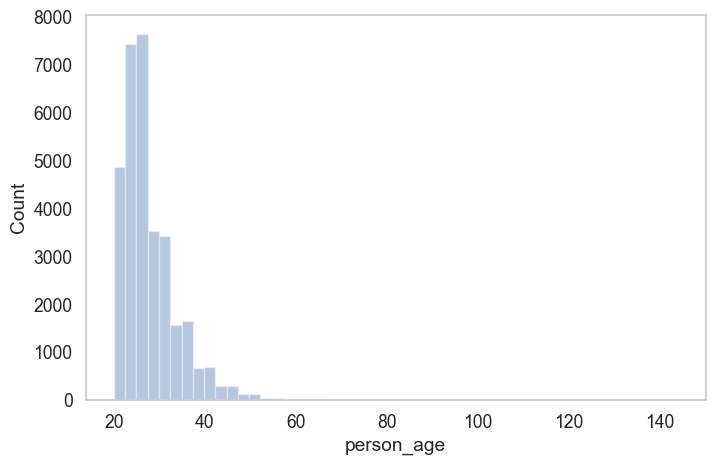

In [6]:
# person_age univariate analysis
plt.subplots(figsize=(8,5))
sns.distplot(df['person_age'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show();

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2099306644.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_income'], kde=False)


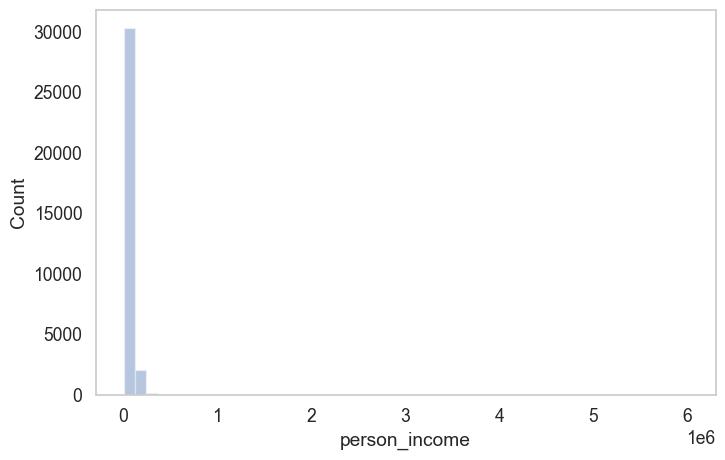

In [7]:
# person_income univariate analysis
plt.subplots(figsize=(8,5))
sns.distplot(df['person_income'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

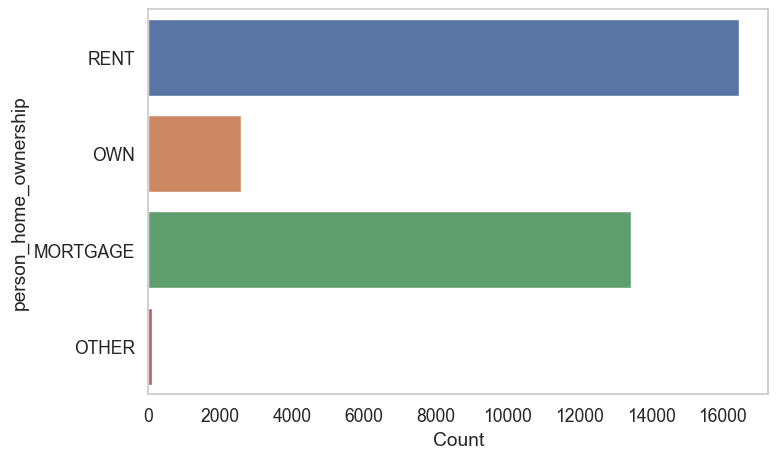

In [8]:
# person_home_ownership univariate analysis
plt.subplots(figsize=(8,5))
sns.countplot(y="person_home_ownership", data=df)
plt.grid(False)
plt.xlabel('Count')
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\3039231630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_emp_length'], kde=False)


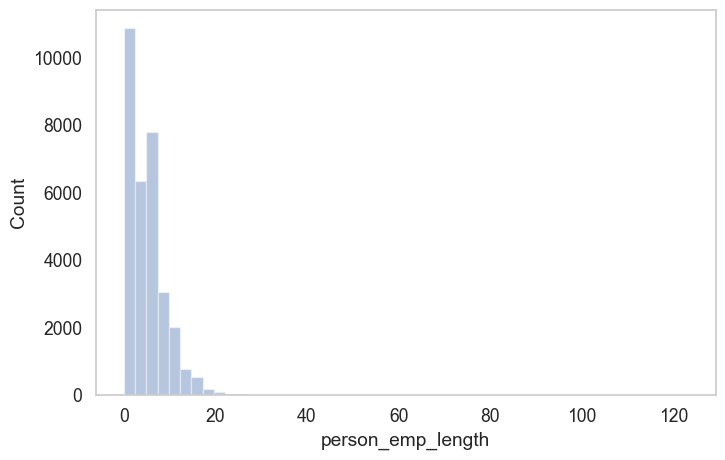

In [9]:
# person_emp_length univariate analysis
plt.subplots(figsize=(8,5))
sns.distplot(df['person_emp_length'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2408291713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde=False) # ดูจำนวนเงินกู้


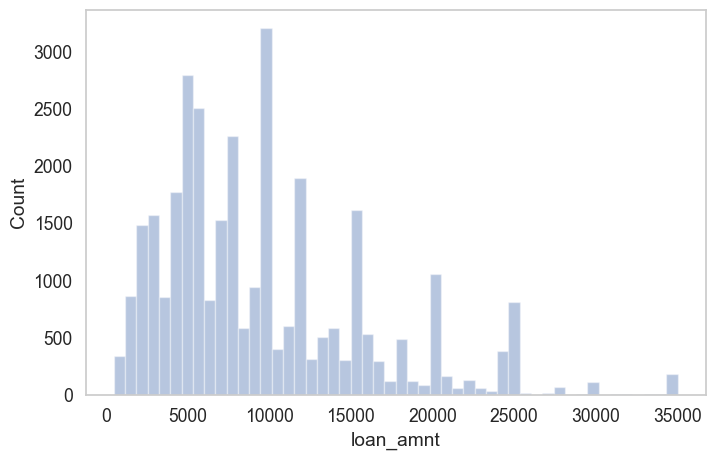

In [10]:
# loan_amnt univariate analysis
plt.subplots(figsize=(8,5)) 
sns.distplot(df['loan_amnt'], kde=False) # ดูจำนวนเงินกู้
plt.grid(False)
plt.ylabel('Count')
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\3244278901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_int_rate'], kde=False) # อัตราดอกเบี้ย


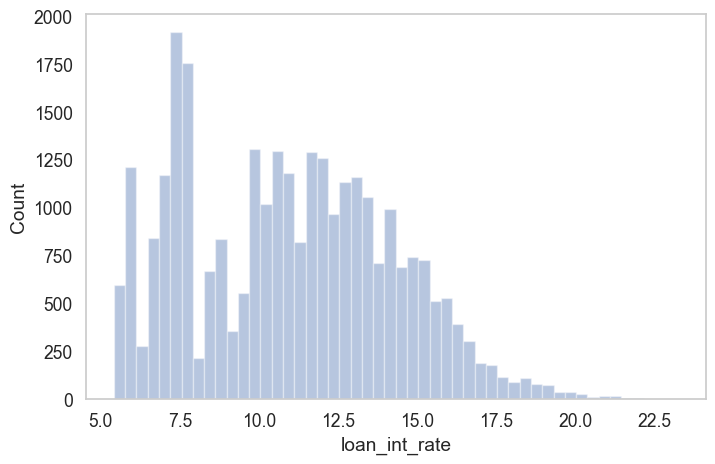

In [11]:
# loan_int_rate univariate analysis
plt.subplots(figsize=(8,5))
sns.distplot(df['loan_int_rate'], kde=False) # อัตราดอกเบี้ย
plt.grid(False)
plt.ylabel('Count')
plt.show()

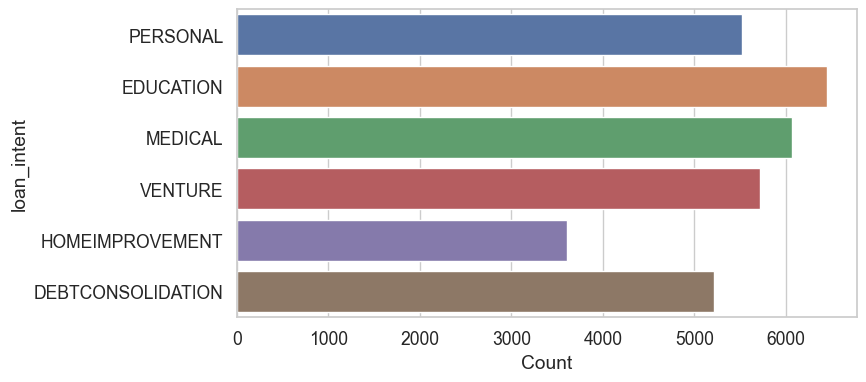

In [12]:
# loan_intent univariate analysis
plt.subplots(figsize=(8,4))
sns.countplot(y="loan_intent", data=df)
plt.xlabel('Count')
plt.show()

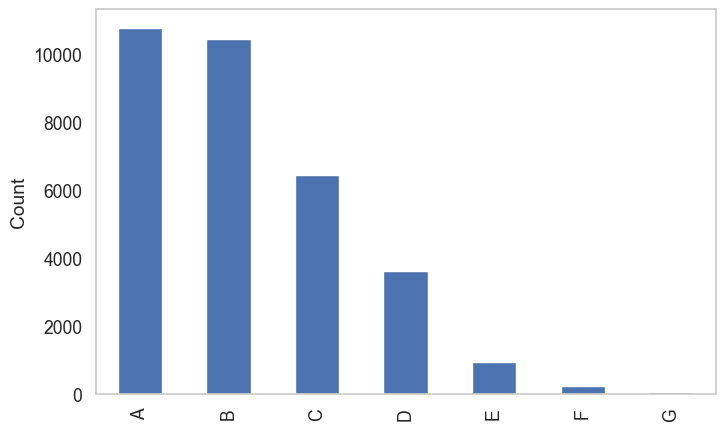

In [13]:
# loan_grade univariate analysis
plt.subplots(figsize=(8,5))
df['loan_grade'].value_counts().plot(kind="bar") # ใช้ barplot แสดงเกรดประวัติการชำระหนี้ 
plt.grid(False)
plt.ylabel('Count')
plt.show()

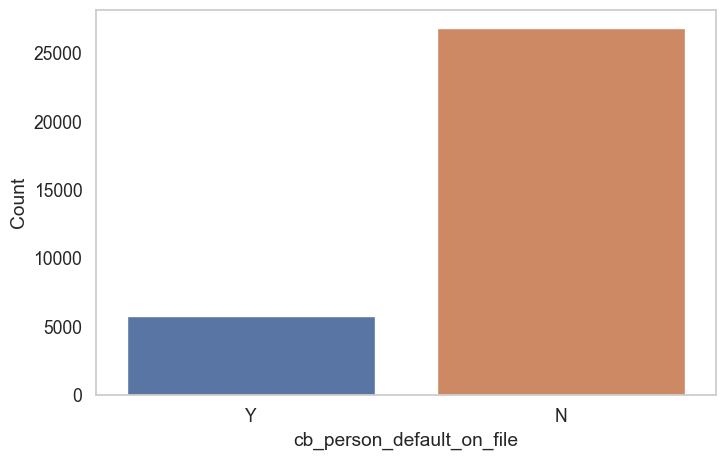

In [14]:
# credit bureau univariate analysis
plt.subplots(figsize=(8,5)) 
sns.countplot(x="cb_person_default_on_file", data=df) 
plt.grid(False)
plt.ylabel('Count')
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2772183582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cb_person_cred_hist_length'], kde=True)


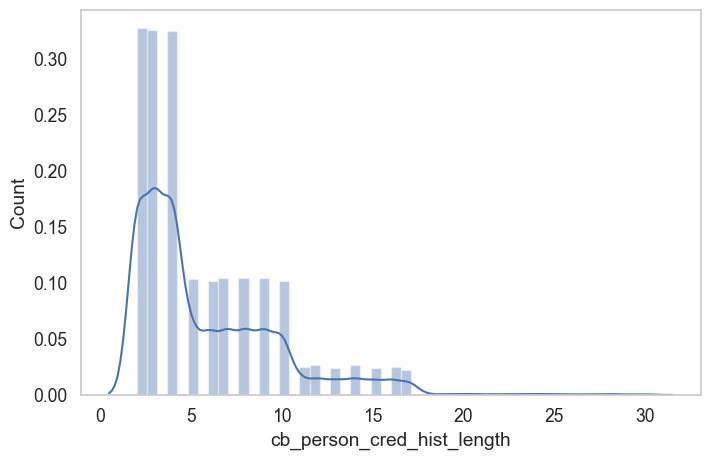

In [15]:
# credit bureau length univariate analysis
plt.subplots(figsize=(8,5)) 
sns.distplot(df['cb_person_cred_hist_length'], kde=True)
plt.grid(False)
plt.ylabel('Count')
plt.show()

### Multivariate analysis 

In [16]:
# Multivariate analysis: comparing loan_intent with loan_amnt and loan_int_rate
multiVar = df.groupby('loan_intent').agg({'loan_amnt': 'mean', 
                               'loan_int_rate': 'mean'})

multiVar = multiVar.sort_values(by='loan_amnt', ascending=False)
multiVar.rename(columns={'loan_amnt': 'ปริมาณเงินกู้', 'loan_int_rate': 'อัตราดอกเบี้ย'}, inplace=True)

print(multiVar)


                   ปริมาณเงินกู้  อัตราดอกเบี้ย
loan_intent                                    
HOMEIMPROVEMENT     10360.520111      11.201152
DEBTCONSOLIDATION    9594.886800      10.983268
VENTURE              9583.777758      10.948275
PERSONAL             9573.772867      10.998221
EDUCATION            9482.678599      10.950261
MEDICAL              9259.582441      11.060194


In [17]:
# Multivariate analysis: comparing credit bureau with loan_amnt and loan_int_rate
multiVar2 = df.groupby('cb_person_default_on_file').agg({'loan_amnt': 'mean', 
                               'loan_int_rate': 'mean'})

multiVar2 = multiVar2.sort_values(by='loan_amnt', ascending=False)
multiVar2.rename(columns={'loan_amnt': 'ปริมาณเงินกู้', 'loan_int_rate': 'อัตราดอกเบี้ย'}, inplace=True)
print(multiVar2)

                           ปริมาณเงินกู้  อัตราดอกเบี้ย
cb_person_default_on_file                              
Y                           10123.359443      14.513800
N                            9475.055895      10.258913


### Exploratory Data Analysis (EDA) and Risk ranking

In [18]:
df_age = df[['loan_status','person_age']] # defining variable (loan_status and person_age)
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5 , duplicates='drop', precision=0)
df_age

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1849262702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5 , duplicates='drop', precision=0)


,loan_status,person_age,bin_person_age
customer_id,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,1,22,"(19.0, 23.0]"
49d00b80-f7ec-41ec-8063-8cc32f384268,0,21,"(19.0, 23.0]"
25172c7f-160a-44ac-b271-5833b7a679f6,1,25,"(23.0, 25.0]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,1,23,"(19.0, 23.0]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,1,24,"(23.0, 25.0]"
...,...,...,...
c1bf6e84-9f6b-4c3e-a1dc-4c5234a7eb4c,0,57,"(32.0, 144.0]"
ece9693f-16c5-416b-bfa7-34eae7bdc4b3,0,54,"(32.0, 144.0]"
1fcb6014-9aad-45be-ac2a-490cfc55c0e4,1,65,"(32.0, 144.0]"


In [19]:
# dividing data (q=row) and group by each group of data
df_age = df[['loan_status', 'person_age']] # defining variable
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)
df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']}) # loan_status count,sum each group
df_age

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\761627487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)


loan_status      
                     count   sum
bin_person_age                  
(19.0, 23.0]          8766  2092
(23.0, 25.0]          6586  1444
(25.0, 27.0]          4615   961
(27.0, 32.0]          6963  1445
(32.0, 144.0]         5651  1167

In [20]:
# calculating distribution and bad rate 
df_age = df[['loan_status', 'person_age']]
df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)

df_age = df_age.groupby('bin_person_age').agg({'loan_status': ['count', 'sum']})
df_age.columns = df_age.columns.map('_'.join)

df_age['dist'] = df_age['loan_status_count']/df_age['loan_status_count'].sum()

df_age['bad_rate'] = df_age['loan_status_sum']/df_age['loan_status_count']

df_age = df_age.reset_index()
df_age

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1564649466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_person_age'] = pd.qcut(df_age['person_age'].astype(float), q=5, duplicates='drop', precision=0)


,bin_person_age,loan_status_count,loan_status_sum,dist,bad_rate
0,"(19.0, 23.0]",8766,2092,0.269053,0.238649
1,"(23.0, 25.0]",6586,1444,0.202142,0.219253
2,"(25.0, 27.0]",4615,961,0.141647,0.208234
3,"(27.0, 32.0]",6963,1445,0.213714,0.207525
4,"(32.0, 144.0]",5651,1167,0.173445,0.206512


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2089441978.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['loan_status'] == 0, 'person_age'], kde=False, bins=40,
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2089441978.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

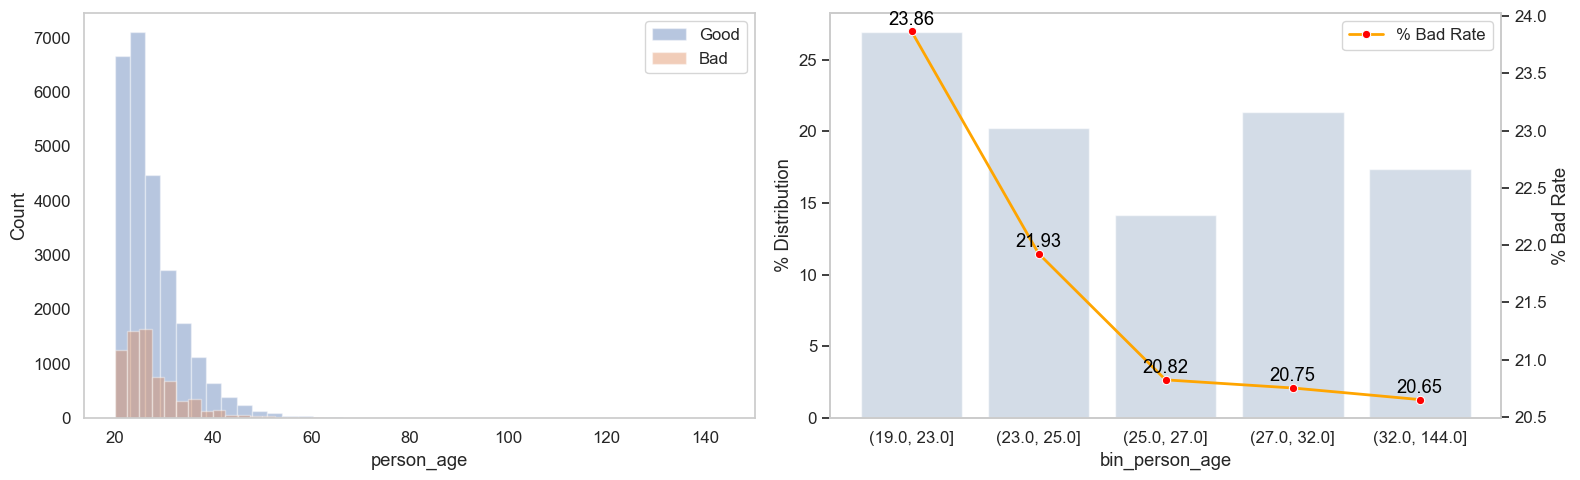

In [21]:
# figure set up
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# person age dist plot set up

sns.distplot(df.loc[df['loan_status'] == 0, 'person_age'], kde=False, bins=40,
             label = 'Good', color = 'C0', ax = ax[0])
sns.distplot(df.loc[df['loan_status'] == 1, 'person_age'], kde=False, bins=20,
             label = 'Bad', color = 'C1', ax = ax[0])

# bin person age set up: bar plot + line chart
# y axis (left) is bar plot 
sns.barplot(x=df_age['bin_person_age'], y=df_age['dist']*100, data=df_age, color='lightsteelblue', alpha=.6, ax=ax[1])

# y axis (right) is line chart 
ax2 = ax[1].twinx()
ax2 = sns.lineplot(data=df_age, x=df_age.index, y=df_age['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='red', markersize=6, color='orange', 
                  linewidth=2, label='% Bad Rate')

# calculating data label 
for x,y in zip(df_age.index, df_age['bad_rate']*100):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


ax[0].legend()
ax[0].grid(False)
ax[1].grid(False)
ax2.grid(False)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


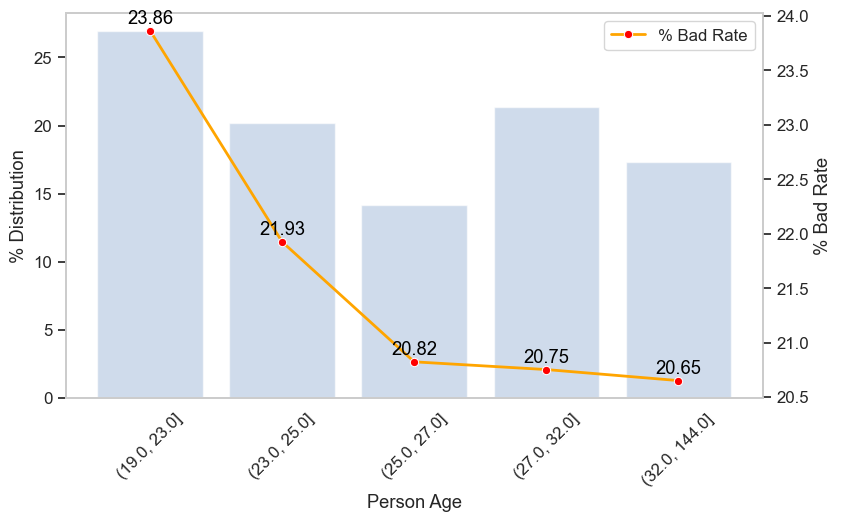

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


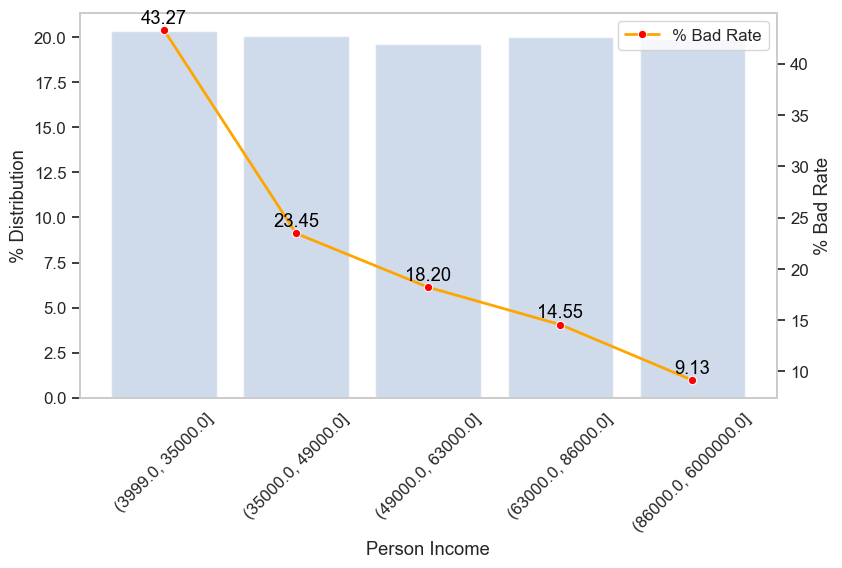

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


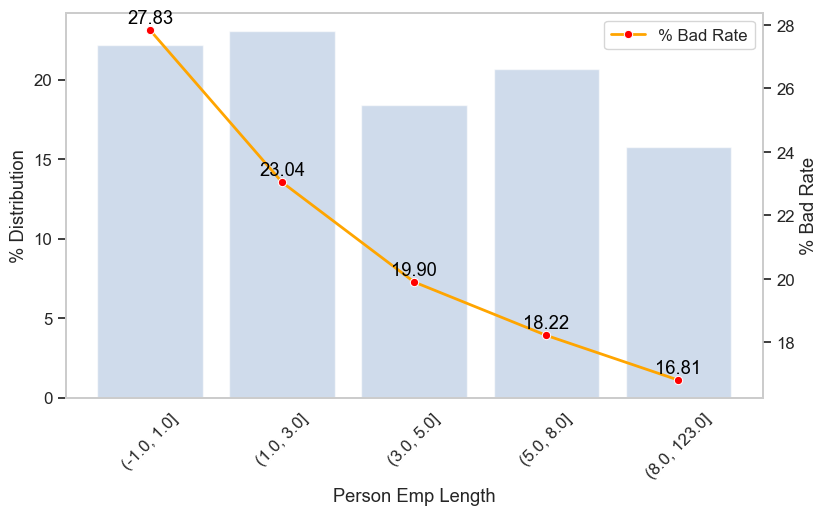

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


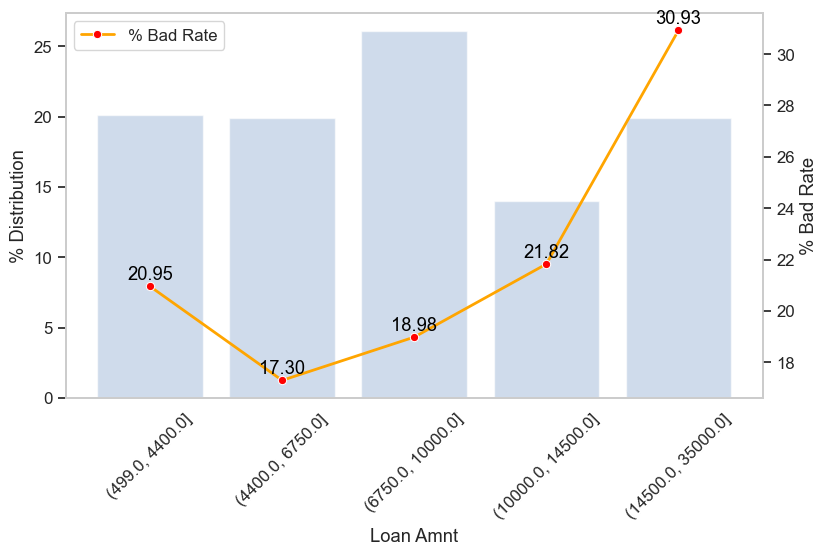

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


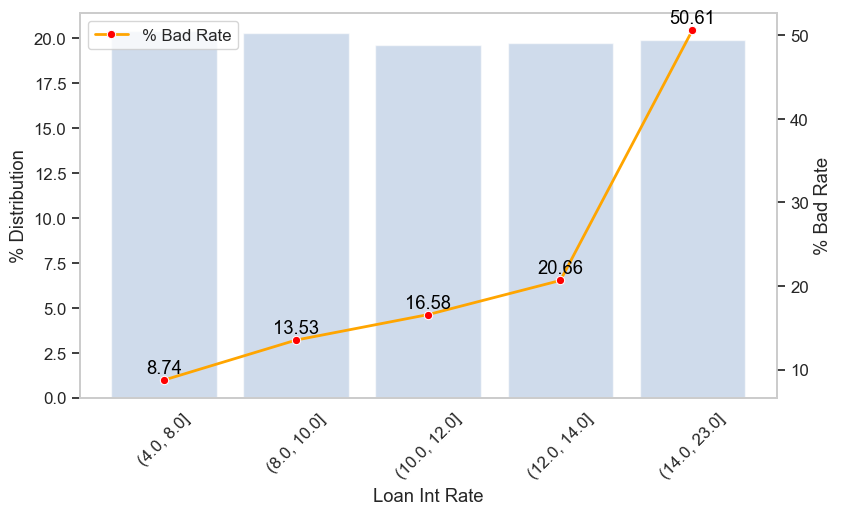

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2548570671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


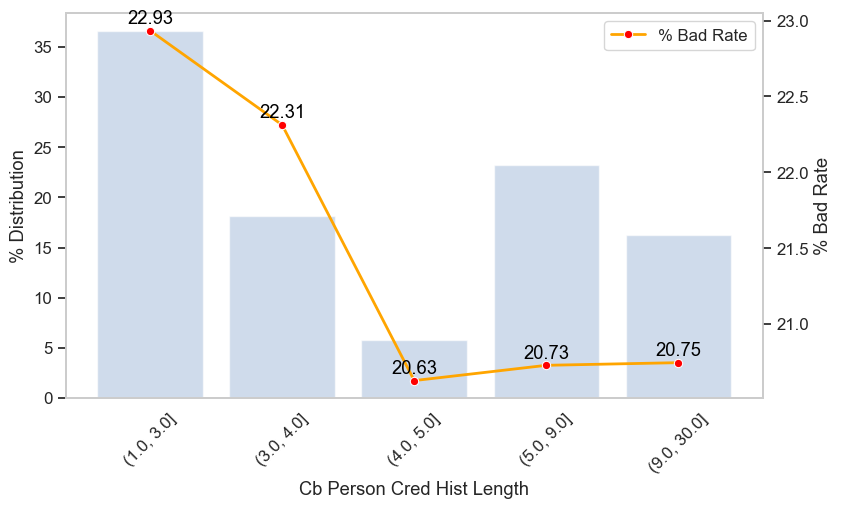

In [37]:
df_plot = df.copy()

for i in df_plot._get_numeric_data().columns:
  if i == 'loan_status':
    pass
  else:

    # creating visualization

    df_group = df_plot[['loan_status', i]]
    df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
    df_group = df_group.groupby('bin_'+i).agg({'loan_status': ['count', 'sum']})
    df_group.columns = df_group.columns.map('_'.join)
    df_group['dist'] = df_group['loan_status_count']/df_group['loan_status_count'].sum()
    df_group['bad_rate'] = df_group['loan_status_sum']/df_group['loan_status_count']
    df_group = df_group.reset_index()
 
    x1 = df_group['bin_'+i].astype(str)
    x2 = df_group.index
    y1 = df_group['dist']*100
    y2 = df_group['bad_rate']*100

    sns.set(font_scale=1.1)
    sns.set_style("whitegrid")
    fig, ax1  = plt.subplots(figsize=(9,5))
    plt.tick_params(axis='x', rotation = 45)

    # y axis is bar chart

    ax1.bar(x1,y1, data = df_group, color='lightsteelblue', alpha=.6)

    # y axis: line chart
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x=x2, y=y2, data=df_group, 
                       marker='o', markerfacecolor='red', 
                       markersize=6, color='orange', linewidth=2, label='% Bad Rate')
    ax1.set_xlabel(i.replace("_"," ").title())
    ax1.set_ylabel('% Distribution')
    ax2.set_ylabel('% Bad Rate')
    ax1.grid(False)
    ax2.grid(False)

    # run loop for each variable
    for x,y in zip(x2,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


    plt.show();

In [23]:
def mean_target_per_category(df, var):
     
    temp_df = pd.Series(df[var].value_counts() / len(df)).reset_index()
    temp_df.columns = [var, '%Dist']

    temp_df = temp_df.merge(df.groupby([var])['loan_status'].mean().reset_index(),
                            on=var,
                            how='left').sort_values(by='loan_status').reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[var], rotation=45)
    ax2 = ax.twinx()
    ax.bar(temp_df.index, temp_df["%Dist"]*100, color='lightsteelblue', 
           alpha=.6)
    
    ax2.plot(temp_df.index, temp_df["loan_status"]*100, color='orange', label='Seconds',
            marker='o', markerfacecolor='red', linewidth=2)
    ax.set_ylabel('% Distribution')
    ax.set_xlabel(var)
    ax2.set_ylabel('% Bad Rate')
    ax.grid(False)
    ax2.grid(False)
    for x,y in zip(temp_df.index, temp_df["loan_status"]*100):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 
    plt.show()

    return temp_df

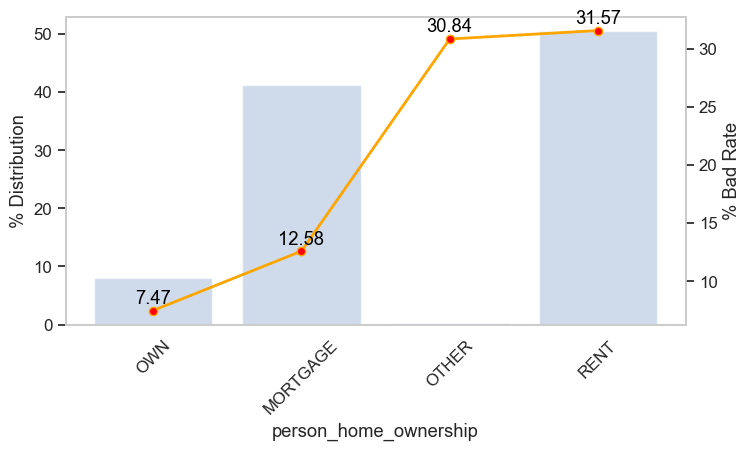

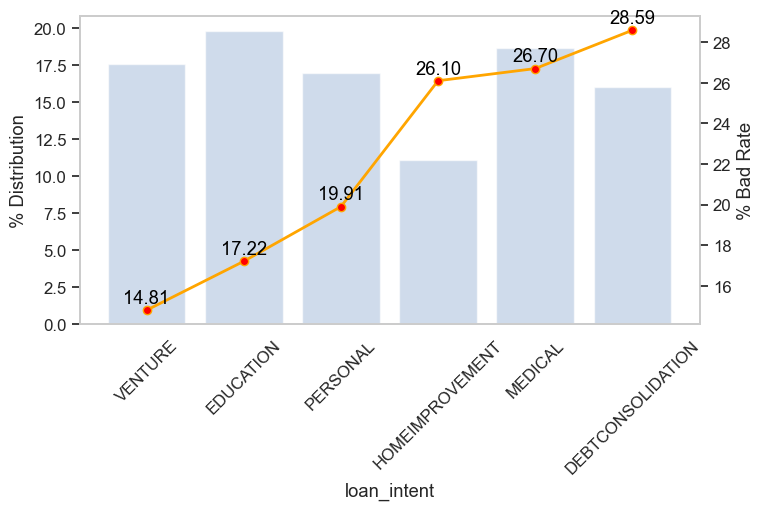

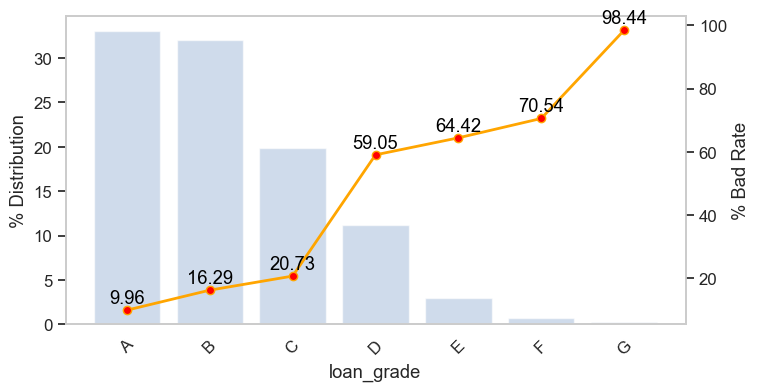

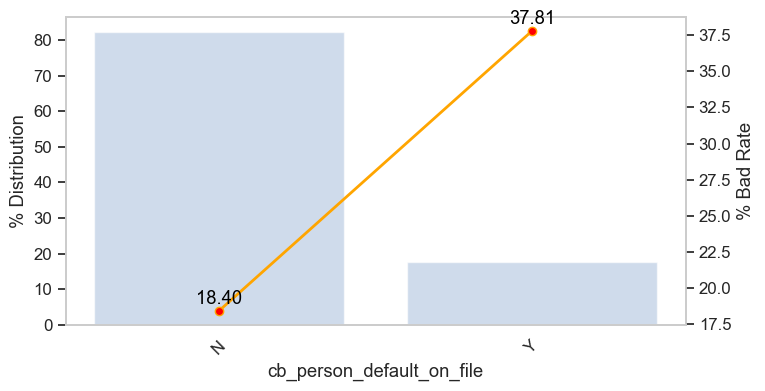

In [40]:
# visualizing distribution
for col in df.loc[:, df.dtypes == object].columns:
  df_cat = mean_target_per_category(df, col)

In [38]:
# Exploring Credit bureau 
df_cat

,cb_person_default_on_file,%Dist,loan_status
0,N,0.82367,0.183969
1,Y,0.17633,0.378068


### Feature engineering

Analyzing features

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1185664261.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dsr'], kde=False)


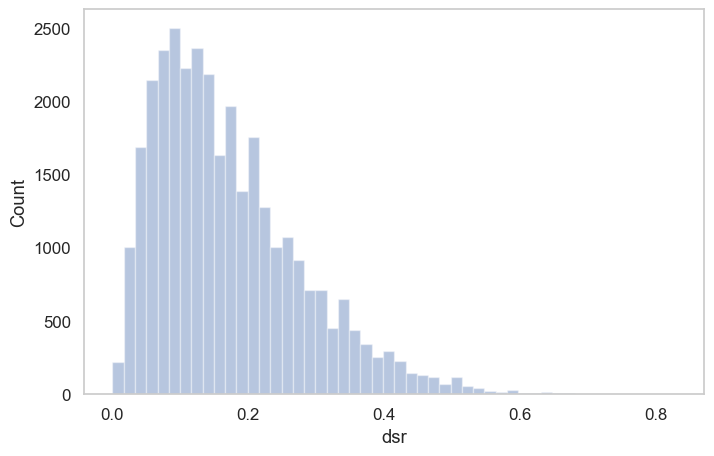

In [42]:
# debt service ratio or DSR
df['dsr'] = df['loan_amnt']/df['person_income']

plt.subplots(figsize=(8,5))
sns.distplot(df['dsr'], kde=False)
plt.grid(False)
plt.ylabel('Count')
plt.show()

In [43]:
df.groupby('loan_intent').agg({'dsr': ['min', 'mean', 'median', 'max']})

dsr                              
                        min      mean    median       max
loan_intent                                              
DEBTCONSOLIDATION  0.004444  0.170800  0.147494  0.711538
EDUCATION          0.005464  0.170141  0.148221  0.771154
HOMEIMPROVEMENT    0.001282  0.165322  0.143223  0.700000
MEDICAL            0.005072  0.175195  0.151515  0.777083
PERSONAL           0.000789  0.169180  0.147692  0.830000
VENTURE            0.004143  0.170490  0.147368  0.714286

In [45]:
df_dsr = df[['loan_status', 'dsr']]
df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0)
df_dsr = df_dsr.groupby('bin_dsr').agg({'loan_status': ['count', 'sum']})
df_dsr.columns = df_dsr.columns.map('_'.join)
df_dsr['dist'] = df_dsr['loan_status_count']/df_dsr['loan_status_count'].sum()
df_dsr['bad_rate'] = df_dsr['loan_status_sum']/df_dsr['loan_status_count']
df_dsr = df_dsr.reset_index()
df_dsr

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1151965997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsr['bin_dsr'] = pd.qcut(df_dsr['dsr'].astype(float), q=5, duplicates='drop', precision=0)


,bin_dsr,loan_status_count,loan_status_sum,dist,bad_rate
0,"(-0.09920000000000001, 0.08]",6524,694,0.200239,0.106376
1,"(0.08, 0.1]",6510,818,0.199810,0.125653
2,"(0.1, 0.2]",6515,956,0.199963,0.146738
3,"(0.2, 0.3]",6517,1233,0.200025,0.189197
4,"(0.3, 0.8]",6515,3408,0.199963,0.523101


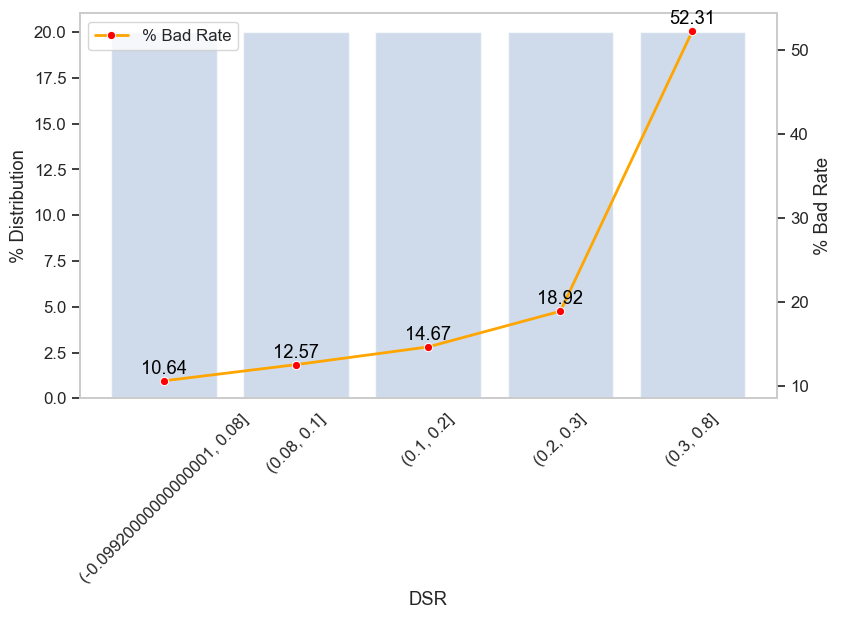

In [46]:
x1 = df_dsr['bin_dsr'].astype(str)
x2 = df_dsr.index
y1 = df_dsr['dist']*100
y2 = df_dsr['bad_rate']*100

sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax1  = plt.subplots(figsize=(9,5))
plt.tick_params(axis='x', rotation = 45)

ax1.bar(x1,y1, data = df_dsr, color='lightsteelblue', alpha=.6)
ax1.xaxis.grid()
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=x2,y=y2, data = df_dsr, marker='o',markerfacecolor='red', markersize=6, color='orange', linewidth=2, label='% Bad Rate')
ax1.set_xlabel('DSR')
ax1.set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
ax1.grid(False)
ax2.grid(False)

for x,y in zip(x2,y2):
        label = "{:.2f}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


plt.show();

### Weight of Evidence (WOE) & Information Value (IV)

In [47]:
def fill_missing(df):

  for col in df.columns: 
    if  df[col].dtypes == np.object : # replace missing object with 'Unidentified'
      df[col] = df[col].fillna(value='Unidentified') 
      
    elif df[col].dtypes == np.number: # replace missing number with median

      df[col] = df[col].fillna(df[col].median()) 
  return df

Cleaning process

In [48]:
# execute
df_clean = fill_missing(df)

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1263263948.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if  df[col].dtypes == np.object :
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1263263948.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif df[col].dtypes == np.number:
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1263263948.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/de

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  dsr                         32581 non-null  float64
dtypes: float64(3), int64(5), ob

In [51]:
# cutting data using binning_numeric
def binning_numeric(df):
  
  for i in df._get_numeric_data().columns:
    if i == 'loan_status':
      continue
    else:
      df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

  return df_clean

In [52]:
df_bin = binning_numeric(df_clean)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   person_age                  32581 non-null  object
 1   person_income               32581 non-null  object
 2   person_home_ownership       32581 non-null  object
 3   person_emp_length           32581 non-null  object
 4   loan_intent                 32581 non-null  object
 5   loan_grade                  32581 non-null  object
 6   loan_amnt                   32581 non-null  object
 7   loan_int_rate               32581 non-null  object
 8   loan_status                 32581 non-null  int64 
 9   cb_person_default_on_file   32581 non-null  object
 10  cb_person_cred_hist_length  32581 non-null  object
 11  dsr                         32581 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2

In [53]:
df_woe = df_bin.copy()
df_woe.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,dsr
customer_id,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(1.0, 3.0]","(0.3, 0.8]"
49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,"(1.0, 3.0]","(0.08, 0.1]"
25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,"(1.0, 3.0]","(0.3, 0.8]"
53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,"(3.0, 4.0]","(0.3, 0.8]"


In [54]:
d = pd.DataFrame(df_woe.groupby(['person_age']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['person_age'])['loan_status'].sum()
d['count_good'] = d['total']-d['count_bad']

d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
d['dist_good'] = d['count_good']/d['count_good'].sum()

d['woe'] = np.log(d.dist_bad/d.dist_good)
d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

d = d.replace([np.inf, -np.inf], 0)
d = d.reset_index()

d

,person_age,total,count_bad,count_good,dist_bad,dist_good,woe,iv
0,"(19.0, 23.0]",8766,2092,6674,0.294275,0.262013,0.116119,0.003746
1,"(23.0, 25.0]",6586,1444,5142,0.203123,0.201869,0.006193,0.000008
2,"(25.0, 27.0]",4615,961,3654,0.135181,0.143452,-0.059385,0.000491
3,"(27.0, 32.0]",6963,1445,5518,0.203263,0.216630,-0.063688,0.000851
4,"(32.0, 144.0]",5651,1167,4484,0.164158,0.176036,-0.069861,0.000830


In [55]:
# sum iv
d['iv'].sum()

0.0059262581959489595

In [56]:
woe_dict = d.groupby(['person_age'])['woe'].mean().to_dict()
woe_dict

{Interval(19.0, 23.0, closed='right'): 0.11611938858812067,
 Interval(23.0, 25.0, closed='right'): 0.006193154341563288,
 Interval(25.0, 27.0, closed='right'): -0.05938510525303306,
 Interval(27.0, 32.0, closed='right'): -0.06368793151607242,
 Interval(32.0, 144.0, closed='right'): -0.0698609291908682}

In [57]:
df_demo_woe = df_woe[['person_age']]
df_demo_woe['woe_person_age'] = df_demo_woe['person_age'].map(woe_dict)
df_demo_woe.sample(10)

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\1150759167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_woe['woe_person_age'] = df_demo_woe['person_age'].map(woe_dict)


,person_age,woe_person_age
customer_id,,
3ff9c074-5570-4d78-8467-8b225badebd8,"(25.0, 27.0]",-0.059385
a23ece8a-5102-4588-bb0a-170996d5fc3c,"(32.0, 144.0]",-0.069861
b56ad179-e950-4f41-9180-1ef3c373cbcb,"(23.0, 25.0]",0.006193
6f90e30e-0559-4606-9e6c-4455ba08a413,"(32.0, 144.0]",-0.069861
14791da5-95bc-4024-9ad7-5d913ef6f736,"(19.0, 23.0]",0.116119
dd652fa0-cb14-4e23-9ea0-c55eeffa4c7e,"(25.0, 27.0]",-0.059385
344072e3-7ade-4cfb-b3e4-d8cb9602e025,"(19.0, 23.0]",0.116119
30ec9cd2-2662-4402-b842-bcb5d423ccfa,"(19.0, 23.0]",0.116119
b0a80e92-3066-4a4a-8e3c-e5e9c57172bf,"(25.0, 27.0]",-0.059385


In [58]:
def woe_iv(df_woe):

  iv_dict = {}
  final_iv = {}

  for i in df_woe.select_dtypes(object).columns:

    ### Calculate WOE and IV ###
    d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

    d['count_bad'] = df_woe.groupby([i])['loan_status'].sum()
    d['count_good'] = d['total']-d['count_bad']

    d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
    d['dist_good'] = d['count_good']/d['count_good'].sum()
    
    d['woe'] = np.log(d.dist_bad/d.dist_good)
    d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

    d = d.replace([np.inf, -np.inf], 0)
    d = d.reset_index()
    
    ### Append dataframe in dictionary ###
    if i not in final_iv:
      final_iv[i] = []
    final_iv[i].append(d)
    
    ### Map WOE value ###
    woe_dict = d.groupby([i])['woe'].mean().to_dict()
    df_woe['woe_'+i] = df_woe[i].map(woe_dict)
    
    ### Calculate final IV of each feature and append in dictionary
    if i not in iv_dict:
      iv_dict[i] = []
    iv_dict[i].append(d['iv'].sum())
  
  ### Generate IV dataframe
  iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
  iv_df.index.name = 'Feature'

  return final_iv, iv_df, df_woe

In [60]:
final_iv, IV, df_woe = woe_iv(df_woe)
final_iv['person_income']

[          person_income  total  count_bad  count_good  dist_bad  dist_good  \
 0     (3999.0, 35000.0]   6630       2869        3761  0.403573   0.147652   
 1    (35000.0, 49000.0]   6546       1535        5011  0.215923   0.196726   
 2    (49000.0, 63000.0]   6397       1164        5233  0.163736   0.205441   
 3    (63000.0, 86000.0]   6515        948        5567  0.133352   0.218554   
 4  (86000.0, 6000000.0]   6493        593        5900  0.083415   0.231627   
 
         woe        iv  
 0  1.005497  0.257327  
 1  0.093113  0.001788  
 2 -0.226904  0.009463  
 3 -0.494039  0.042093  
 4 -1.021295  0.151368  ]

In [61]:
IV.sort_values(by='IV', ascending=False)

,IV
Feature,
loan_grade,0.881539
dsr,0.719621
loan_int_rate,0.590146
person_income,0.462039
person_home_ownership,0.376710
cb_person_default_on_file,0.163922
loan_intent,0.095705
loan_amnt,0.073652
person_emp_length,0.049930


In [62]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 616d39c7-4cca-4e2e-a65c-848a9543cfe1 to 5185b116-af1e-4951-b9f0-d9d1f0d79b3e
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  object 
 1   person_income                   32581 non-null  object 
 2   person_home_ownership           32581 non-null  object 
 3   person_emp_length               32581 non-null  object 
 4   loan_intent                     32581 non-null  object 
 5   loan_grade                      32581 non-null  object 
 6   loan_amnt                       32581 non-null  object 
 7   loan_int_rate                   32581 non-null  object 
 8   loan_status                     32581 non-null  int64  
 9   cb_person_default_on_file       32581 non-null  object 
 10  cb_person_cred_hist_length      32581 non-null  object 
 11  dsr                             

In [63]:
df_woe.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,...,woe_person_income,woe_person_home_ownership,woe_person_emp_length,woe_loan_intent,woe_loan_grade,woe_loan_amnt,woe_loan_int_rate,woe_cb_person_default_on_file,woe_cb_person_cred_hist_length,woe_dsr
customer_id,,,,,,,,,,,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,"(19.0, 23.0]","(49000.0, 63000.0]",RENT,"(8.0, 123.0]",PERSONAL,D,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,...,-0.226904,0.502614,-0.323157,-0.115973,1.642076,0.472619,1.209506,0.778461,0.064186,1.368686
49d00b80-f7ec-41ec-8063-8cc32f384268,"(19.0, 23.0]","(3999.0, 35000.0]",OWN,"(3.0, 5.0]",EDUCATION,B,"(499.0, 4400.0]","(10.6, 11.5]",0,N,...,1.005497,-1.240559,-0.022117,-0.294121,-0.360917,-0.051501,-0.215255,-0.213465,0.064186,-0.663736
25172c7f-160a-44ac-b271-5833b7a679f6,"(23.0, 25.0]","(3999.0, 35000.0]",MORTGAGE,"(-1.0, 1.0]",MEDICAL,C,"(4400.0, 6750.0]","(11.5, 13.6]",1,N,...,1.005497,-0.662570,0.323545,0.266357,-0.064818,-0.288606,-0.117564,-0.213465,0.064186,1.368686
a8f721ac-9696-48b3-ae35-bc8b13592d26,"(19.0, 23.0]","(63000.0, 86000.0]",RENT,"(3.0, 5.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,N,...,-0.494039,0.502614,-0.022117,0.266357,-0.064818,0.472619,1.209506,-0.213465,0.064186,1.368686
53be6c0c-0a33-41c1-a8d0-e9784b077f98,"(23.0, 25.0]","(49000.0, 63000.0]",RENT,"(5.0, 8.0]",MEDICAL,C,"(14500.0, 35000.0]","(13.6, 23.2]",1,Y,...,-0.226904,0.502614,-0.225528,0.266357,-0.064818,0.472619,1.209506,0.778461,0.028656,1.368686


In [64]:
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
loan_grade,0.881539,Suspicious
dsr,0.719621,Suspicious
loan_int_rate,0.590146,Suspicious
person_income,0.462039,Strong
person_home_ownership,0.376710,Strong
cb_person_default_on_file,0.163922,Medium
loan_intent,0.095705,Weak
loan_amnt,0.073652,Weak
person_emp_length,0.049930,Weak


### Data partition

In [65]:
X = df_woe.loc[:, df_woe.columns.str.startswith('woe_')]
y = df_woe['loan_status']
X.head()

,woe_person_age,woe_person_income,woe_person_home_ownership,woe_person_emp_length,woe_loan_intent,woe_loan_grade,woe_loan_amnt,woe_loan_int_rate,woe_cb_person_default_on_file,woe_cb_person_cred_hist_length,woe_dsr
customer_id,,,,,,,,,,,
616d39c7-4cca-4e2e-a65c-848a9543cfe1,0.116119,-0.226904,0.502614,-0.323157,-0.115973,1.642076,0.472619,1.209506,0.778461,0.064186,1.368686
49d00b80-f7ec-41ec-8063-8cc32f384268,0.116119,1.005497,-1.240559,-0.022117,-0.294121,-0.360917,-0.051501,-0.215255,-0.213465,0.064186,-0.663736
25172c7f-160a-44ac-b271-5833b7a679f6,0.006193,1.005497,-0.662570,0.323545,0.266357,-0.064818,-0.288606,-0.117564,-0.213465,0.064186,1.368686
a8f721ac-9696-48b3-ae35-bc8b13592d26,0.116119,-0.494039,0.502614,-0.022117,0.266357,-0.064818,0.472619,1.209506,-0.213465,0.064186,1.368686
53be6c0c-0a33-41c1-a8d0-e9784b077f98,0.006193,-0.226904,0.502614,-0.225528,0.266357,-0.064818,0.472619,1.209506,0.778461,0.028656,1.368686


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)
    
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.781806
1    0.218194
Name: loan_status, dtype: float64
0    0.781801
1    0.218199
Name: loan_status, dtype: float64


### Train logistic regression

In [67]:
import statsmodels.api as sm
model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True, 
                                                        maxiter=100,
                                                        intercept=True)

model.summary()

results_as_html = model.summary().tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary['Feature'] = summary.index
summary = summary.reset_index(drop=True)
summary['Feature'] = summary['Feature'].str.replace('woe_', '')
summary = summary.set_index(['Feature'], drop=True)
summary

c:\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.343446
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Feature,,,,,,
const,-1.3469,0.020,-67.028,0.000,-1.386,-1.307
person_age,0.4686,0.371,1.264,0.206,-0.258,1.195
person_income,0.9459,0.035,26.837,0.000,0.877,1.015
person_home_ownership,0.8825,0.032,27.192,0.000,0.819,0.946
person_emp_length,0.1514,0.089,1.700,0.089,-0.023,0.326
loan_intent,1.3542,0.063,21.508,0.000,1.231,1.478
loan_grade,1.1191,0.034,32.843,0.000,1.052,1.186
loan_amnt,0.7445,0.091,8.153,0.000,0.566,0.923
loan_int_rate,0.0744,0.041,1.809,0.070,-0.006,0.155


In [70]:
def train_model(X_train, y_train):

    ### Fit logistic regression ###
    model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True, 
                                                            maxiter=100,
                                                            intercept=True)
    
    ### Generate model summary ###
    results_as_html = model.summary().tables[1].as_html()
    summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
    summary['Feature'] = summary.index
    summary = summary.reset_index(drop=True)
    summary['Feature'] = summary['Feature'].str.replace('woe_', '')
    summary = summary.set_index(['Feature'], drop=True)

    return model, summary
lr, lr_summary = train_model(X_train, y_train)
lr_summary

Optimization terminated successfully.
         Current function value: 0.343446
         Iterations 7


c:\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


,coef,std err,z,P>|z|,[0.025,0.975]
Feature,,,,,,
const,-1.3469,0.020,-67.028,0.000,-1.386,-1.307
person_age,0.4686,0.371,1.264,0.206,-0.258,1.195
person_income,0.9459,0.035,26.837,0.000,0.877,1.015
person_home_ownership,0.8825,0.032,27.192,0.000,0.819,0.946
person_emp_length,0.1514,0.089,1.700,0.089,-0.023,0.326
loan_intent,1.3542,0.063,21.508,0.000,1.231,1.478
loan_grade,1.1191,0.034,32.843,0.000,1.052,1.186
loan_amnt,0.7445,0.091,8.153,0.000,0.566,0.923
loan_int_rate,0.0744,0.041,1.809,0.070,-0.006,0.155


### Predict results

In [71]:
y_pred_train = lr.predict(sm.add_constant(X_train))
y_pred_test = lr.predict(sm.add_constant(X_test))

y_pred_test

customer_id
a7ffec61-d78c-4432-8a0c-3c45c15d52dd    0.138296
e4811ccc-a5d6-4736-89d9-8c44798637be    0.165213
353355c6-4fc3-4474-a53d-272968f0cb70    0.019102
0350a780-fe5b-451f-95e0-fb8819461c1a    0.056905
56bae8b4-16c7-4790-9f2a-6aec3e8604c0    0.003937
                                          ...   
bfc11849-7cb3-4fbd-a919-9270f2a1c725    0.003830
fa392284-258f-419f-bb25-5abe3b6f5ecc    0.010725
2ec5fb34-1178-4a50-a295-b32b561d74d3    0.022056
36589fd9-ae25-4485-bd3c-2e2ac47bf601    0.764325
7cb74578-1da4-49bb-b9a2-2cdb97e48f86    0.912509
Length: 6517, dtype: float64

### Variance Inflation Factor (VIF)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = X.copy()
features.columns = features.columns.str.replace('woe_', '')
features = features.assign(const=1)
features

vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,Feature,VIF Factor
0,person_age,2.277841
1,person_income,1.570873
2,person_home_ownership,1.106796
3,person_emp_length,1.080712
4,loan_intent,1.017112
5,loan_grade,2.825568
6,loan_amnt,1.608685
7,loan_int_rate,2.841616
8,cb_person_default_on_file,1.329389
9,cb_person_cred_hist_length,2.231290


In [74]:
def vif_calculation(X):
  
  features = X.copy()
  features.columns = features.columns.str.replace('woe_', '')
  features = features.assign(const=1)

  vif = pd.DataFrame()
  vif["Feature"] = features.columns
  vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
  
  return vif
vif = vif_calculation(X)
vif

,Feature,VIF Factor
0,person_age,2.277841
1,person_income,1.570873
2,person_home_ownership,1.106796
3,person_emp_length,1.080712
4,loan_intent,1.017112
5,loan_grade,2.825568
6,loan_amnt,1.608685
7,loan_int_rate,2.841616
8,cb_person_default_on_file,1.329389
9,cb_person_cred_hist_length,2.231290


### Model evaluation

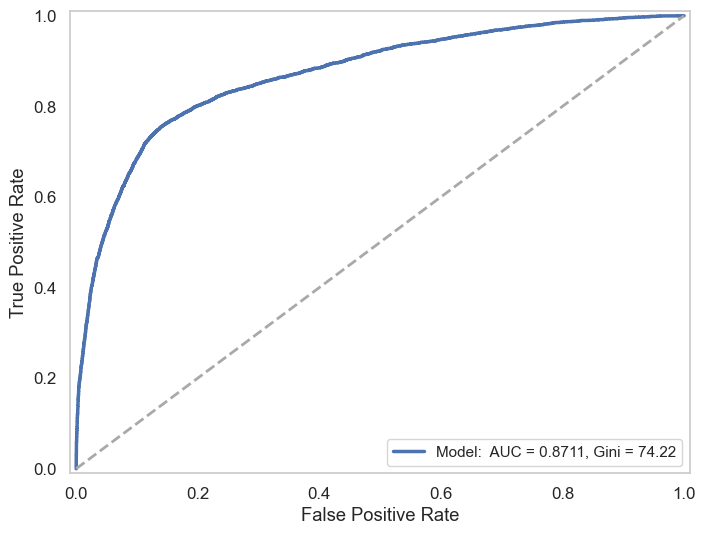

Training set
Test set


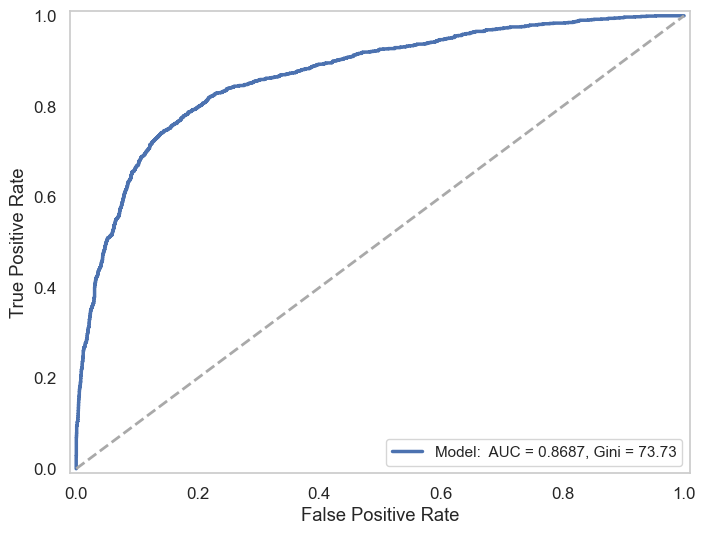

Training set


In [76]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report

def roc_gini(y, y_pred_proba):

  assert y.shape == y_pred_proba.shape
  fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
  auc = metrics.roc_auc_score(y, y_pred_proba)
  gini = (2 * auc - 1)*100

  fig = plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='C0', label='%s AUC = %0.4f, Gini = %0.2f' % ('Model: ', auc,  gini), 
           linewidth=2.5)
  plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--', linewidth=2)
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right',fontsize='small')
  plt.grid(False)
  plt.show()

  print('Training set')
roc_gini(y_train.values, y_pred_train)
    
print('Test set')
roc_gini(y_test.values, y_pred_test)

### Summary overall of model

In [77]:
def summary_model(IV, vif, summary):
    
    summary_model = IV.merge(vif, left_on= 'Feature', right_on='Feature').merge(lr_summary ,on='Feature')
    summary_model = summary_model.rename(columns={'P>|z|': "p-value", "VIF Factor": "vif", "IV":"iv"})
    ### calculate feature importance ###
    summary_model['feature_importance'] = (summary_model['coef'].abs()/summary_model['coef'].abs().sum())*100
    
    return summary_model
summary = summary_model(IV, vif, lr_summary)
summary

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
0,person_age,0.005926,Not useful,2.277841,0.4686,0.371,1.264,0.206,-0.258,1.195,6.845573
1,person_income,0.462039,Strong,1.570873,0.9459,0.035,26.837,0.000,0.877,1.015,13.818240
2,person_home_ownership,0.376710,Strong,1.106796,0.8825,0.032,27.192,0.000,0.819,0.946,12.892057
3,person_emp_length,0.049930,Weak,1.080712,0.1514,0.089,1.700,0.089,-0.023,0.326,2.211737
4,loan_intent,0.095705,Weak,1.017112,1.3542,0.063,21.508,0.000,1.231,1.478,19.782917
5,loan_grade,0.881539,Suspicious,2.825568,1.1191,0.034,32.843,0.000,1.052,1.186,16.348443
6,loan_amnt,0.073652,Weak,1.608685,0.7445,0.091,8.153,0.000,0.566,0.923,10.876076
7,loan_int_rate,0.590146,Suspicious,2.841616,0.0744,0.041,1.809,0.070,-0.006,0.155,1.086877
8,cb_person_default_on_file,0.163922,Medium,1.329389,-0.0537,0.050,-1.065,0.287,-0.152,0.045,0.784480
9,cb_person_cred_hist_length,0.003596,Not useful,2.231290,0.2206,0.476,0.463,0.643,-0.713,1.154,3.222649


### Model tuning

Trick for tuning the logistic regression model

* Remove some features (p-value > 0.005)
* Remove some features (not risk ranking e.g. loan_amnt)
* Remove some features (low predictive power from IV e.g. not-useful)

In [78]:
summary['Feature'].loc[summary['p-value']>0.005].to_list()

['person_age',
 'person_emp_length',
 'loan_int_rate',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

c:\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.344957
         Iterations 7
Training set


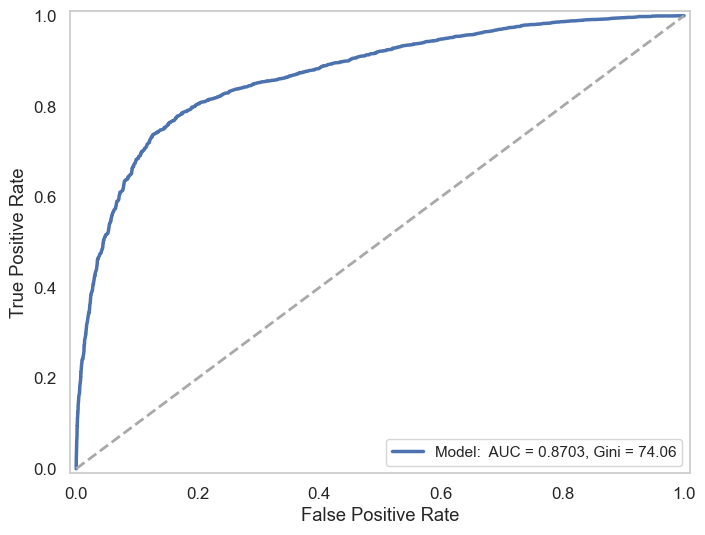

Training set
Test set


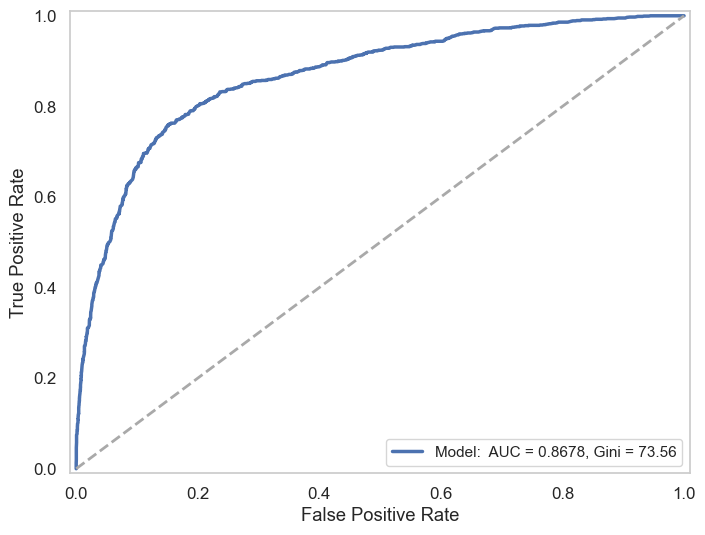

Training set


In [83]:
X_2 = X.drop(['woe_cb_person_cred_hist_length', 'woe_cb_person_default_on_file', 
              'woe_person_age', 'woe_person_emp_length', 'woe_loan_int_rate',
              'woe_loan_amnt'], axis=1)
y_2 = df_woe['loan_status']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=99, stratify=y)
lr_2, lr_2_summary = train_model(X_train_2, y_train_2)

y_pred_train_2 = lr_2.predict(sm.add_constant(X_train_2))
y_pred_test_2 = lr_2.predict(sm.add_constant(X_test_2))

print('Training set')
roc_gini(y_train_2.values, y_pred_train_2)
    
print('Test set')
roc_gini(y_test_2.values, y_pred_test_2)

In [84]:
vif_2 = vif_calculation(X_2)
vif_2

,Feature,VIF Factor
0,person_income,1.170192
1,person_home_ownership,1.068363
2,loan_intent,1.003869
3,loan_grade,1.025455
4,dsr,1.133359
5,const,1.106320


In [85]:
summary_2 = summary_model(IV, vif_2, lr_2_summary)
summary_2.sort_values(by='feature_importance', ascending=False)

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
2,loan_intent,0.095705,Weak,1.003869,1.3542,0.063,21.508,0.0,1.231,1.478,26.386859
3,loan_grade,0.881539,Suspicious,1.025455,1.1191,0.034,32.843,0.0,1.052,1.186,21.805888
0,person_income,0.462039,Strong,1.170192,0.9459,0.035,26.837,0.0,0.877,1.015,18.431052
1,person_home_ownership,0.376710,Strong,1.068363,0.8825,0.032,27.192,0.0,0.819,0.946,17.195690
4,dsr,0.719621,Suspicious,1.133359,0.8304,0.026,31.819,0.0,0.779,0.882,16.180511


### Final model

c:\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.345974
         Iterations 7


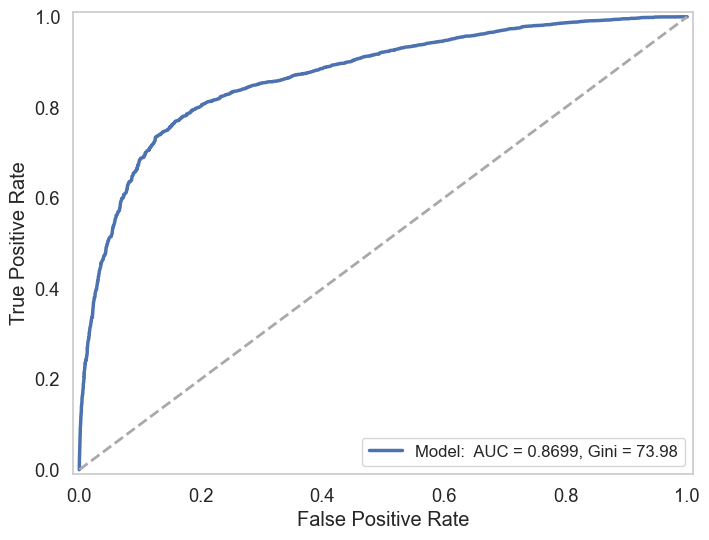

Training set
              precision    recall  f1-score   support

        Good       0.88      0.95      0.91     25472
         Bad       0.73      0.52      0.61      7109

    accuracy                           0.85     32581
   macro avg       0.80      0.73      0.76     32581
weighted avg       0.84      0.85      0.84     32581



In [88]:
X_final = X.drop(['woe_cb_person_cred_hist_length', 'woe_cb_person_default_on_file', 
              'woe_person_age', 'woe_person_emp_length', 'woe_loan_int_rate',
              'woe_loan_amnt'], axis=1)
y_final = df_woe['loan_status']

df_grade = df_woe.copy()
threshold = 0.5

final_model = sm.Logit(y_final, sm.add_constant(X_final)).fit(disp=True, maxiter=100, intercept=True)

df_grade['pd'] = final_model.predict(sm.add_constant(X_final))
df_grade['prediction'] = np.where(df_grade['pd'] >= threshold, 1, 0)

sns.set(font_scale=1.2)
sns.set_style("whitegrid")
roc_gini(y_final.values, df_grade['pd'].values)

target_names = ['Good', 'Bad']
print(classification_report(y_final.values, df_grade['prediction'].values, target_names=target_names))

### Score grading

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\563913674.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grade['pd'], kde=False, bins=30)


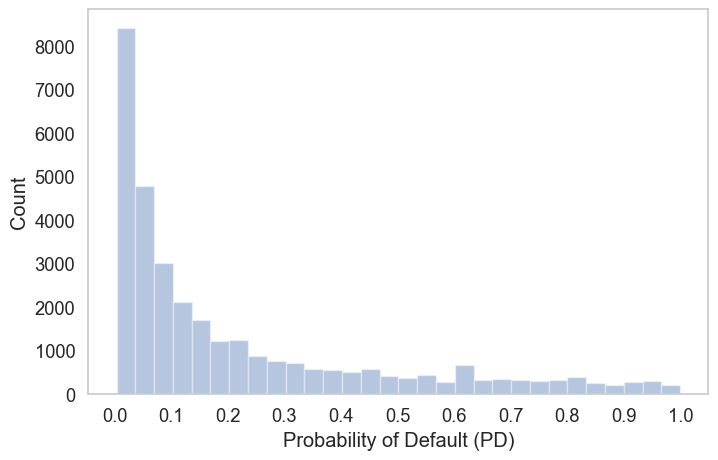

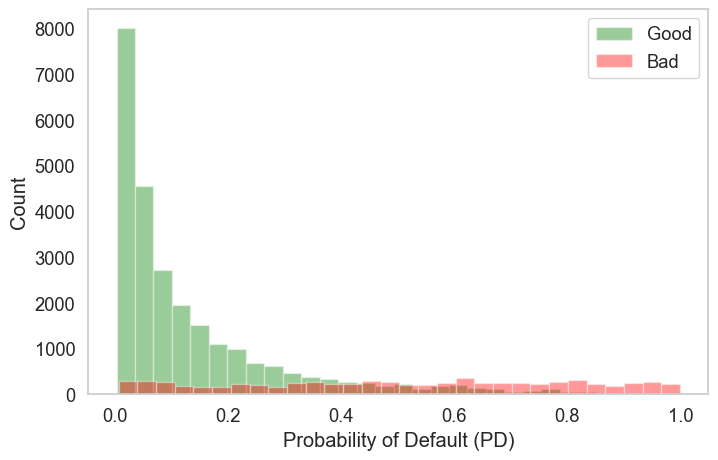

In [89]:
df_grade['score_grade'] = pd.cut(df_grade['pd'], 
                                      bins=[0, 0.05, 0.10, 0.15, 0.30, 0.50, 0.70, 1], 
                                      labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig= plt.figure(figsize=(8,5))
sns.distplot(df_grade['pd'], kde=False, bins=30)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Probability of Default (PD)')
plt.ylabel('Count')
plt.grid(False)
plt.show();

x_good = df_grade['pd'].loc[df_grade['loan_status']==0].values
x_bad = df_grade['pd'].loc[df_grade['loan_status']==1].values

fig, ax = plt.subplots(figsize=(8,5))
ax = plt.hist(x_good, label='Good', bins=30, alpha=.4, color='green')
ax = plt.hist(x_bad, label='Bad', bins=30, alpha=.4, color='red')
plt.xlabel('Probability of Default (PD)')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.show();

In [90]:
report = df_grade[['score_grade', 'loan_status']]
report = report.groupby('score_grade').agg({'loan_status': ['count', 'sum']})
report.columns = report.columns.map('_'.join)
report['dist'] = report['loan_status_count']/report['loan_status_count'].sum()
report['bad_rate'] = report['loan_status_sum']/report['loan_status_count']
report

,loan_status_count,loan_status_sum,dist,bad_rate
score_grade,,,,
A,10817,391,0.332003,0.036147
B,5225,411,0.160370,0.078660
C,3105,269,0.095301,0.086634
D,4988,812,0.153095,0.162791
E,3383,1526,0.103834,0.451079
F,2445,1515,0.075044,0.619632
G,2618,2185,0.080354,0.834607


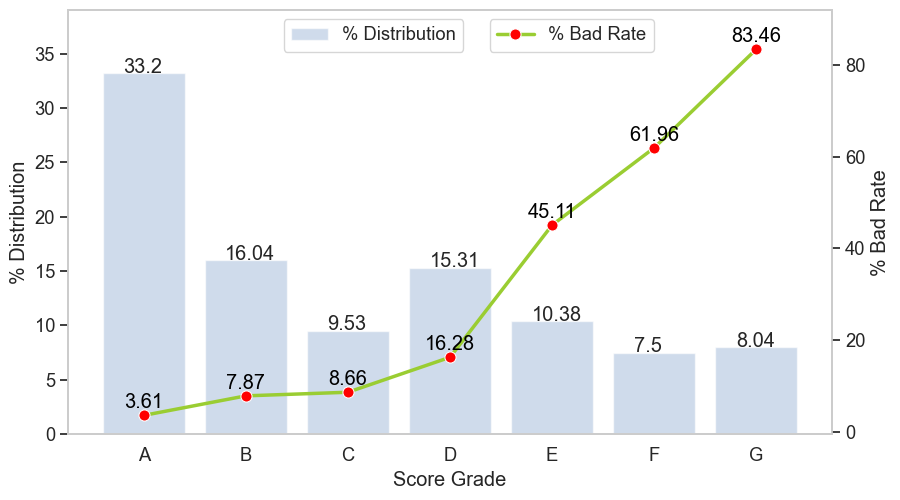

In [92]:
def plot_score_grade(report):

  fig, ax = plt.subplots(figsize=(10,6))
  sns.set(font_scale=1.2)
  sns.set_style("whitegrid")

  x1 = report.index
  y1 = np.round(report['dist'].values*100, 2)
  x2 = x1
  y2 = np.round(report['bad_rate'].values*100, 2)

  ax.bar(x1,y1, data = report, color='lightsteelblue', label='% Distribution', alpha=.6)
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.set_xlabel('Score Grade')
  ax.set_ylabel('% Distribution')
  
  xlocs, xlabs = plt.xticks()
  plt.xticks(xlocs, xlabs)
  for i, v in enumerate(y1):
      plt.text(xlocs[i] - 0.2, v + 0.02, str(v))
   
  ax2 = ax.twinx()
  ax2 = sns.lineplot(data=report, x=x2, y=y2, marker='o', markerfacecolor='red', 
                     markersize=8, color='yellowgreen', linewidth=2.5, linestyle='-',
                     label='% Bad Rate')
  ax2.set_ylabel('% Bad Rate')
  ax2.yaxis.grid(False)
  ax2.xaxis.grid(False)
  ax.legend(loc='lower left', bbox_to_anchor=(0.27, 0.88))
  ax2.legend(loc='lower left', bbox_to_anchor=(0.54, 0.88))
  ax.set_ylim([0, 39])
  ax2.set_ylim([-0.5, 92])

  for x,y in zip(x2,y2):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

  plt.tight_layout(pad=3.0)

  plt.show();

  return

plot_score_grade(report)

### Score impact and business suggestion

In [98]:
df_impact = df_grade[['loan_status', 'pd', 'prediction', 'score_grade']]
grade = 'A'

### Choose Cut-off 
print('Cut-off is {}'.format(grade))
print('_'*60)
df_impact['status'] = np.where(df_impact['pd']<=0.05, 'Approved', 'Rejected')
        
### Calculate % approval rate ###
approve = df_impact.loc[(df_impact['status']=='Approved')].shape[0]
reject = df_impact.loc[(df_impact['status']=='Rejected')].shape[0]
approval_rate = np.round((approve/(approve+reject))*100,2)
print('Total = {}'.format(approve+reject))
print('Approved = {}'.format(approve))
print('Rejected = {}'.format(reject))
print('Approval rate = {} %'.format(approval_rate))
print('_'*60)

### Calculate % bad rate ###
bad = df_impact.loc[(df_impact['status']=='Approved')&(df_impact['loan_status']==1)].shape[0]
good = df_impact.loc[(df_impact['status']=='Approved')&(df_impact['loan_status']==0)].shape[0]
bad_rate = np.round((bad/(good+bad))*100,2)
print('Bad = {}'.format(bad))
print('Good = {}'.format(good))
print('Bad rate = {} %'.format(bad_rate))
print('_'*60)

Cut-off is A
____________________________________________________________
Total = 32581
Approved = 10817
Rejected = 21764
Approval rate = 33.2 %
____________________________________________________________
Bad = 391
Good = 10426
Bad rate = 3.61 %
____________________________________________________________


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_4664\2766608170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impact['status'] = np.where(df_impact['pd']<=0.05, 'Approved', 'Rejected')


In [100]:
def cut_off(df_grade):

    df_impact = df_grade.copy()
    cut_off_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    cut_off_pd = [0.05, 0.1, 0.15, 0.3, 0.5, 0.7, 1]
    rows = []
    for i in cut_off_pd:
        df_impact['status'] = np.where(df_impact['pd']<=i, 'Approved', 'Rejected')
        
        ### Calculate % approval rate ###

        approve = df_impact.loc[(df_impact['status']=='Approved')].shape[0]
        reject = df_impact.loc[(df_impact['status']=='Rejected')].shape[0]
        approval_rate = np.round((approve/(approve+reject))*100,2)
        
        ### Calculate % bad rate ###
        bad = df_impact.loc[(df_impact['status']=='Approved')&(df_impact['loan_status']==1)].shape[0]
        good = df_impact.loc[(df_impact['status']=='Approved')&(df_impact['loan_status']==0)].shape[0]
        bad_rate = np.round((bad/(good+bad))*100,2)
        
        rows.append([i, approve, reject, approval_rate, good, bad, bad_rate])
        print(rows)

    df_cut_off = pd.DataFrame(rows, columns=["pd", "approved", "rejected", 
                                             "%_approval_rate", "good", "bad", "%_bad_rate"])
    df_cut_off['grade'] = cut_off_grade
    df_cut_off = df_cut_off[["grade", "pd", "approved", "rejected", 
                             "%_approval_rate", "good", "bad", "%_bad_rate"]]
    
    return df_cut_off

df_cut_off = cut_off(df_grade)
df_cut_off

[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61]]
[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61], [0.1, 16042, 16539, 49.24, 15240, 802, 5.0]]
[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61], [0.1, 16042, 16539, 49.24, 15240, 802, 5.0], [0.15, 19147, 13434, 58.77, 18076, 1071, 5.59]]
[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61], [0.1, 16042, 16539, 49.24, 15240, 802, 5.0], [0.15, 19147, 13434, 58.77, 18076, 1071, 5.59], [0.3, 24135, 8446, 74.08, 22252, 1883, 7.8]]
[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61], [0.1, 16042, 16539, 49.24, 15240, 802, 5.0], [0.15, 19147, 13434, 58.77, 18076, 1071, 5.59], [0.3, 24135, 8446, 74.08, 22252, 1883, 7.8], [0.5, 27518, 5063, 84.46, 24109, 3409, 12.39]]
[[0.05, 10817, 21764, 33.2, 10426, 391, 3.61], [0.1, 16042, 16539, 49.24, 15240, 802, 5.0], [0.15, 19147, 13434, 58.77, 18076, 1071, 5.59], [0.3, 24135, 8446, 74.08, 22252, 1883, 7.8], [0.5, 27518, 5063, 84.46, 24109, 3409, 12.39], [0.7, 29963, 2618, 91.96, 25039, 4924, 16.43]]
[[0.05, 10817, 21764, 33.

,grade,pd,approved,rejected,%_approval_rate,good,bad,%_bad_rate
0,A,0.05,10817,21764,33.20,10426,391,3.61
1,B,0.10,16042,16539,49.24,15240,802,5.00
2,C,0.15,19147,13434,58.77,18076,1071,5.59
3,D,0.30,24135,8446,74.08,22252,1883,7.80
4,E,0.50,27518,5063,84.46,24109,3409,12.39
5,F,0.70,29963,2618,91.96,25039,4924,16.43
6,G,1.00,32581,0,100.00,25472,7109,21.82


### Conclusion
ตามตาราง แสดงผลการวิเคราะห์ข้อมูลออกมาเป็นเกรดทั้งหมด 7 เกรด (A-G) ซึ่งจะแสดงผลว่าเมื่อเลือกที่จะ cut-off แต่ละเกรดจะมีการแสดงผลดังนี้ 
* จำนวนคนที่อนุมัติ(approve)
* จำนวนคนที่ปฏิเสธ(reject)
* อันตราการอนุมัติเมื่อเทียบกับข้อมูลทั้งหมด 
* Good/Bad คิดเป็น Bad rate 

ตัวอย่างเช่น หากเลือกเกรด A เป็นการเลือกอนุมัติทั้งหมด 10,817 คน และปฎิเสธ 21,764 คน ซึ่งคิดเป็น 33.20% ของจำนวนทั้งหมด และมีประเภท Good 10,426 Bad 391 คิดเป็น 3.61% Bad rate